In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_acc:.4f}')

model.save('mnist_cnn.keras')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 166s 82ms/step - accuracy: 0.8761 - loss: 0.3939 - val_accuracy: 0.9861 - val_loss: 0.0393
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 212s 88ms/step - accuracy: 0.9764 - loss: 0.0782 - val_accuracy: 0.9869 - val_loss: 0.0403
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 145s 77ms/step - accuracy: 0.9831 - loss: 0.0554 - val_accuracy: 0.9910 - val_loss: 0.0276
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 207s 80ms/step - accuracy: 0.9866 - loss: 0.0441 - val_accuracy: 0.9899 - val_loss: 0.0314
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 195s 76ms/step - accuracy: 0.9891 - loss: 0.0365 - val_accuracy: 0.9907 - val_loss: 0.0299
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9895 - loss: 0.0351

Test accuracy: 0.9907


The number is a 7


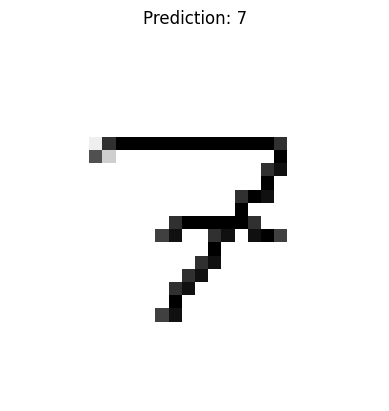

The number is a 2


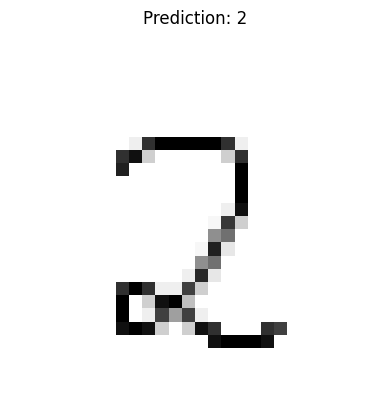

The number is a 9


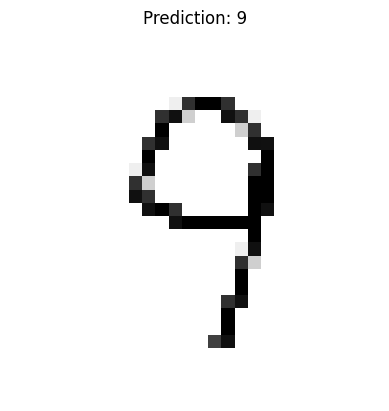

The number is a 8


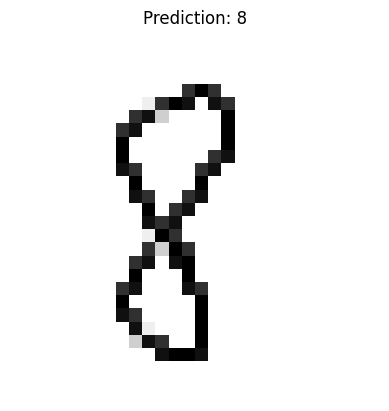

The number is a 5


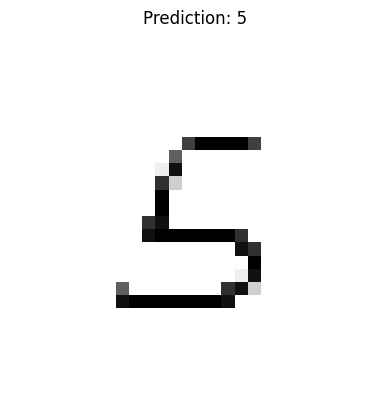

The number is a 1


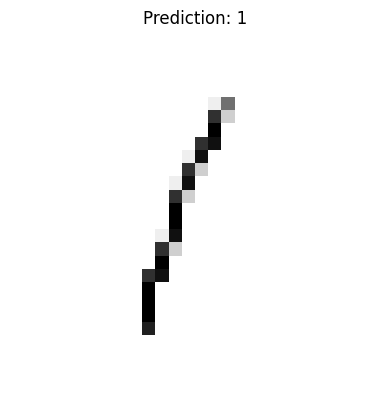

The number is a 1


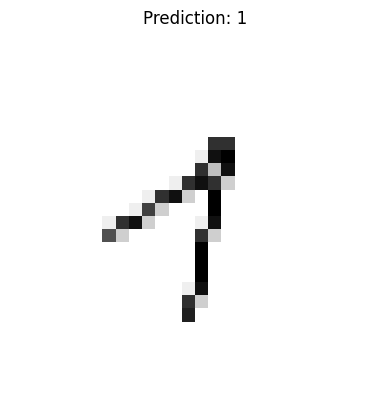

The number is a 8


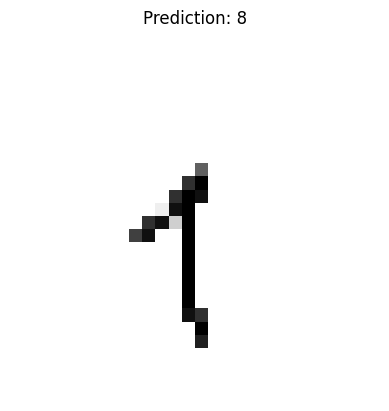

The number is a 7


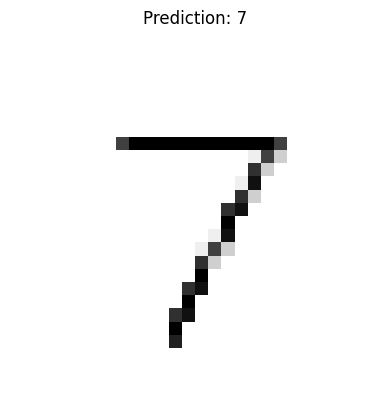

The number is a 7


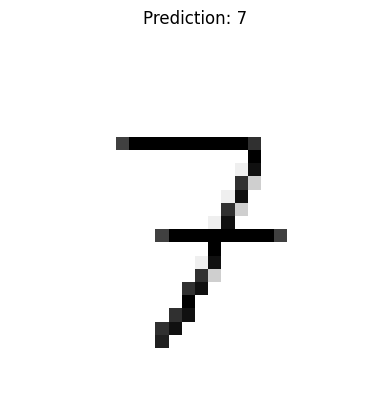

The number is a 2


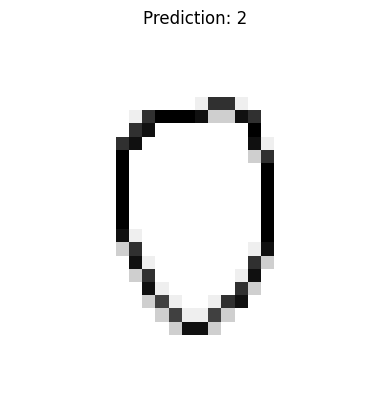

The number is a 5


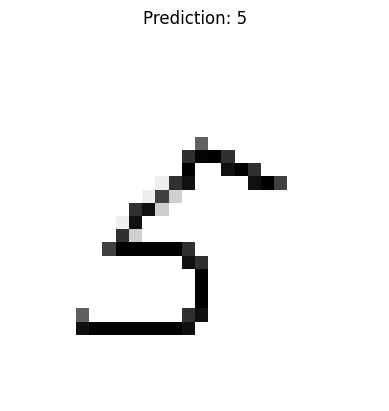

The number is a 3


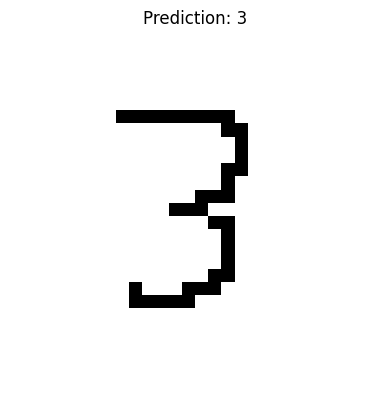

The number is a 2


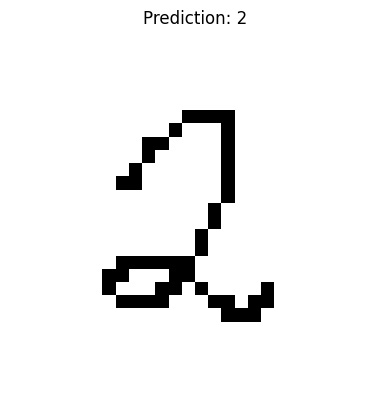

The number is a 1


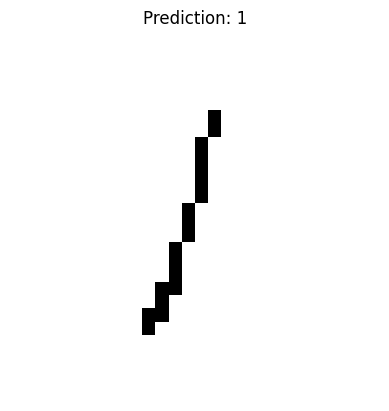

The number is a 0


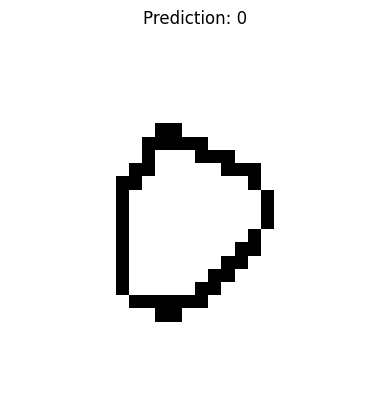

The number is a 8


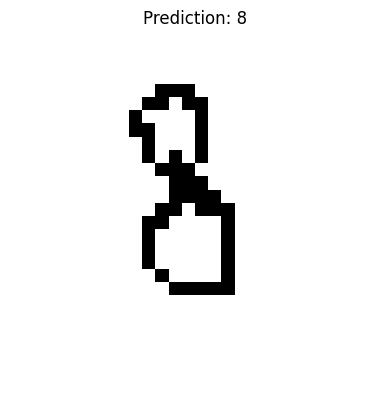

The number is a 7


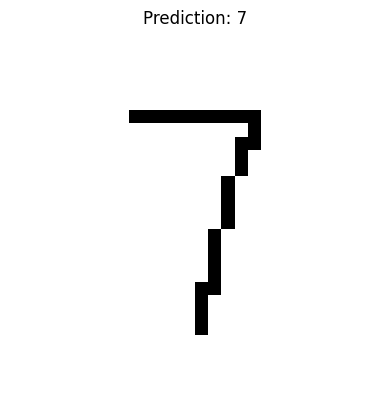

The number is a 4


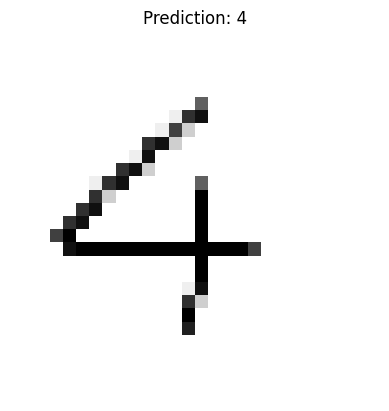

In [ ]:
img_index = 1
img_dir = 'digits'

while True:
    img_path = os.path.join(img_dir, f'digit{img_index}.png')
    
    if not os.path.isfile(img_path):
        break

    try:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise ValueError(f'Image {img_path} could not be read.')
        
        img = np.invert(np.array([img]))  
        prediction = model.predict(img, verbose=0)  
        predicted_digit = np.argmax(prediction)

        print(f'The number is a {predicted_digit}')
        
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.title(f'Prediction: {predicted_digit}')
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f'Error with image {img_path}: {e}')
    
    img_index += 1